In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#欲進行分類的資料 與 分群數
data=pd.read_csv("cdata.csv")
k=4 #define k=4

In [3]:
#random initial points with k=4
import math
first=True
def initial_point(data, cluster=k, set_seed=1):
    np.random.seed(set_seed)
    initial_x = np.random.randint(math.floor(data["x"].quantile(0.1))*100, math.ceil(data["x"].quantile(0.9))*100, cluster)/100
    initial_y = np.random.randint(math.floor(data["y"].quantile(0.1))*100, math.ceil(data["y"].quantile(0.9))*100, cluster)/100
    return initial_x,initial_y

In [4]:
#計算距離
def distance(x,y,initial_x,initial_y, k): return round(((x-initial_x)**2+(y-initial_y)**2)**0.5, k)

In [5]:
#繪製殘差圖
def scatter_plot(initial_x,initial_y,lr,color=None):
    plt.subplot(1,2,lr)
    plt.scatter(data["x"], data["y"], c=color)
    plt.scatter(initial_x,initial_y, c="k")

round  1 
initial x :  [0.37 2.35 0.72 7.67] 
initial y :  [ 1.93  0.03 -0.67  1.35]


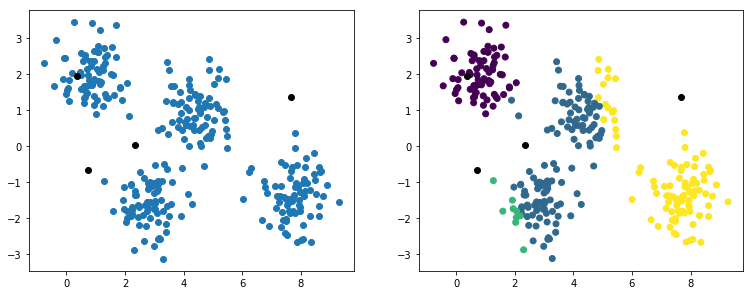

round  2 
initial x :  [0.83629726 3.52069764 1.93272222 7.3052033 ] 
initial y :  [ 2.00802055 -0.38169291 -1.86026667 -0.91501319]


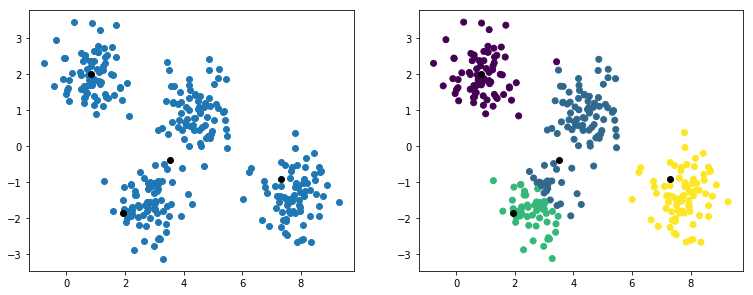

round  3 
initial x :  [0.90144474 4.10926238 2.60988125 7.75368933] 
initial y :  [ 1.98726184  0.38869109 -1.85822083 -1.37324267]


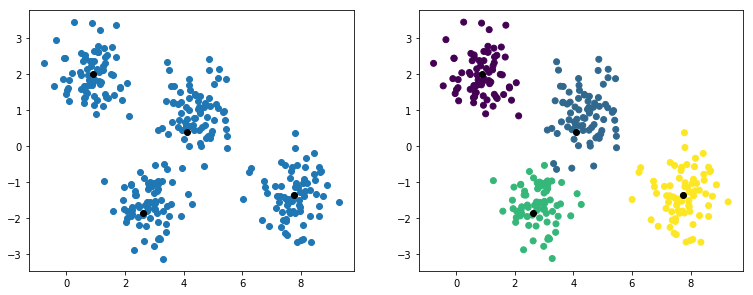

round  4 
initial x :  [0.86771467 4.38638205 2.80004444 7.75368933] 
initial y :  [ 1.982584    0.89077949 -1.62610417 -1.37324267]


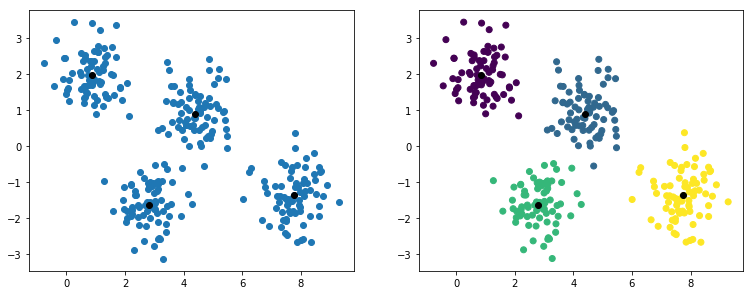

round  5 
initial x :  [0.86771467 4.41906933 2.83081067 7.75368933] 
initial y :  [ 1.982584    0.94973333 -1.58438267 -1.37324267]


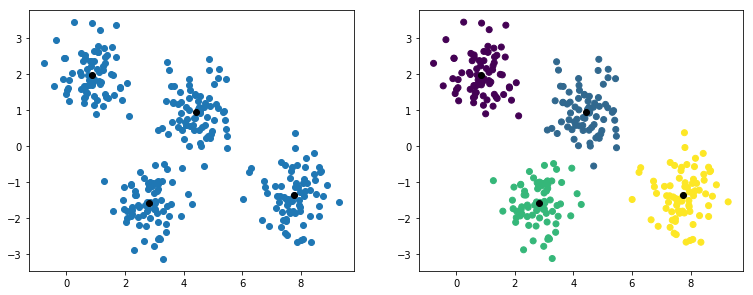

222.89459999999997

In [6]:
#主程式 Kmeans
def main(k=4, cout=True, set_seed=1):
    first=True; time=1
    last_initial_x=np.asarray(list(range(k))); initial_x=np.asarray(list(range(k)))-1
    while ((last_initial_x==initial_x).all() == False) and time<50:
        if first==True: initial_x,initial_y=initial_point(data, k, set_seed)
        if cout==True: 
            print("round ", time, "\ninitial x : ", initial_x , "\ninitial y : ", initial_y)
            plt.figure(figsize=(12.8,4.8)); scatter_plot(initial_x, initial_y, 1, None)
        box=pd.DataFrame()
        for i in range(k): box[i]=distance(data["x"], data["y"], initial_x[i], initial_y[i], k)
        box['best_index']=np.argmin(box.values,axis=1)
        if cout==True: scatter_plot(initial_x, initial_y, 2, box["best_index"]); plt.show()
        last_initial_x=initial_x.copy(); last_initial_y=initial_y.copy()
        ave=data[["x","y"]].groupby(box["best_index"]).mean().reset_index()
        for i in range(len(ave)):
            initial_x[ave["best_index"][i]]=ave["x"][i]
            initial_y[ave["best_index"][i]]=ave["y"][i]
        time+=1; first=False
    return box.iloc[:,0:k].min(axis=1).sum()
main(4)

In [7]:
#Calculate SSE for each k
k_range=50; k_box=(list(range(k_range)))
for i in range(k_range): k_box[i]=main(i+1, False)

In [8]:
#Print all the SSE
print(k_box)

[829.5, 591.44, 355.095, 222.89459999999997, 209.06923, 205.94422600000001, 187.1866253, 179.05785328000002, 172.655259079, 162.1305303502, 154.47172490921, 163.929286120558, 158.7635744537713, 147.82138798720382, 153.71165328562313, 144.4743172997641, 137.99978191250952, 140.57674694128514, 124.18242898305346, 123.34987841313901, 119.24568685440471, 118.52659326080571, 115.46506801675051, 117.83727843212029, 112.47657978263042, 118.64810306375391, 118.01242841281076, 103.4156506185995, 104.7952572694142, 109.8262305839612, 102.98853380433056, 102.96069545549508, 110.53866708230578, 102.29849460856244, 108.55409038607283, 104.21307675543497, 97.5934704932004, 102.39155161803154, 102.57590109844632, 102.99237033664497, 94.42591548590327, 93.53622285518674, 90.79245682893375, 91.70273681728355, 89.83376944496335, 101.13403886016005, 85.44892593573613, 84.3564708350028, 91.56570779979694, 81.12164869031301]


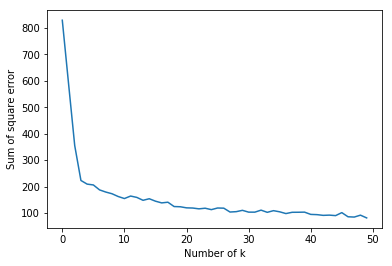

In [9]:
#Plot the SSE curve to find best k
plt.plot(range(len(k_box)), k_box)
plt.ylabel('Sum of square error')
plt.xlabel('Number of k')
plt.show()

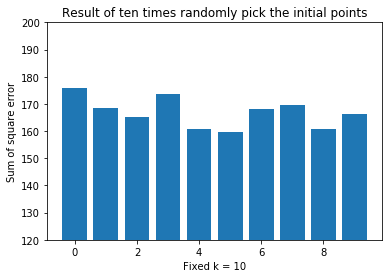

In [10]:
#Plot of ten times randomly pick the initial points
k10SSE=(list(range(10)))
np.random.seed(1)
for index, value in enumerate(np.random.randint(1,1000,10)): k10SSE[index]=(main(10, False, set_seed=value))
plt.bar(range(len(k10SSE)), k10SSE)
plt.ylim(120,200)
plt.ylabel('Sum of square error')
plt.xlabel('Fixed k = 10')
plt.title('Result of ten times randomly pick the initial points')
plt.show()